1. Spotting correlations

Load the remote file:

https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
with Pandas and create scatter plots with all possible combinations of the following features:

features_1
features_2
features_3
Are these features correlated?

features are not correlated


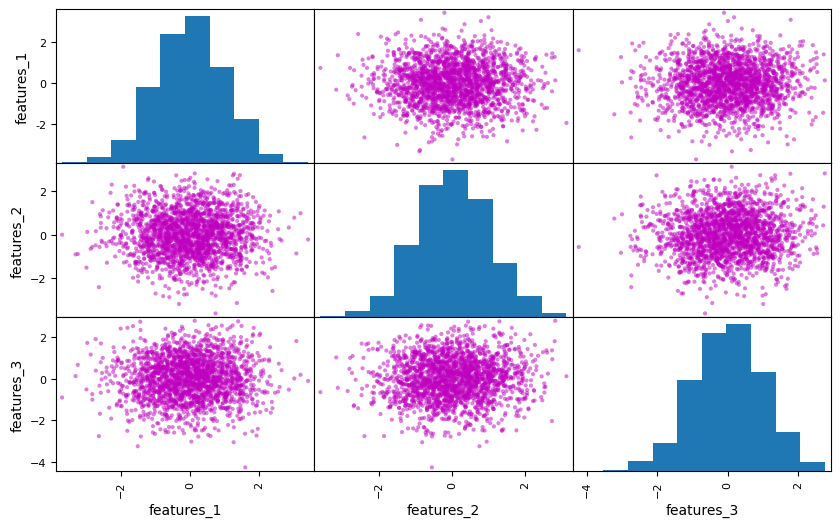

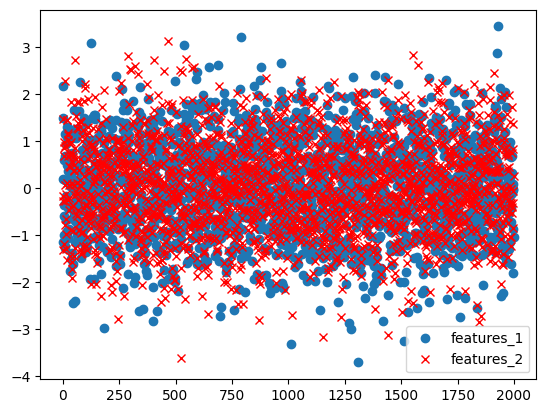

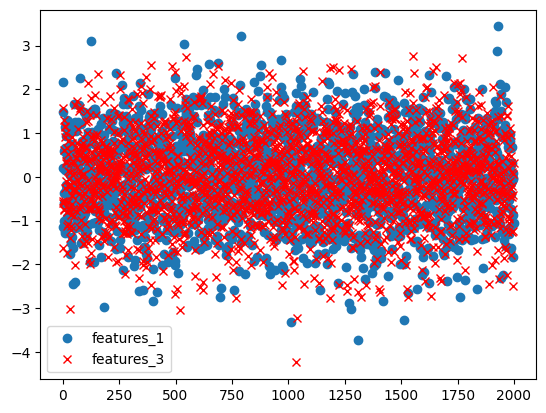

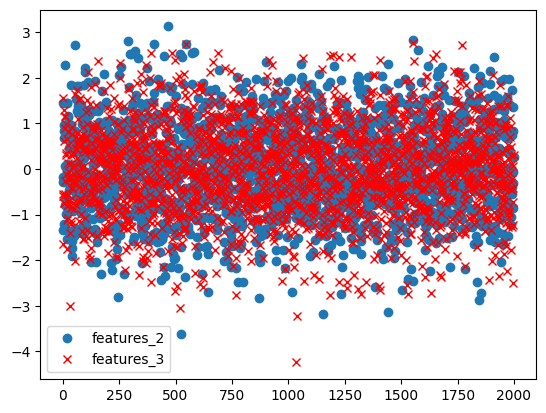

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv"
rgdata=pd.read_csv("regression_generated.csv")
tmp = pd.plotting.scatter_matrix(rgdata[['features_1','features_2', 'features_3']],
                                          figsize=(10,6), c="m", grid='True')
correle = rgdata[['features_1','features_2', 'features_3']].corr()

df=pd.read_csv("regression_generated.csv")
f1_2=df.loc[:,["features_1","features_2"]]
f1_2.plot(style=['o','rx'])
f1_3=df.loc[:,["features_1","features_3"]]
f1_3.plot(style=['o','rx'])
f2_3=df.loc[:,["features_2","features_3"]]
f2_3.plot(style=['o','rx']) 
print("features are not correlated")



2. Color-coded scatter plot

Produce a scatter plot from a dataset with two categories.

Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
Display the dataset in a scatter plot marking the two categories with different marker colors.
An example is given below:

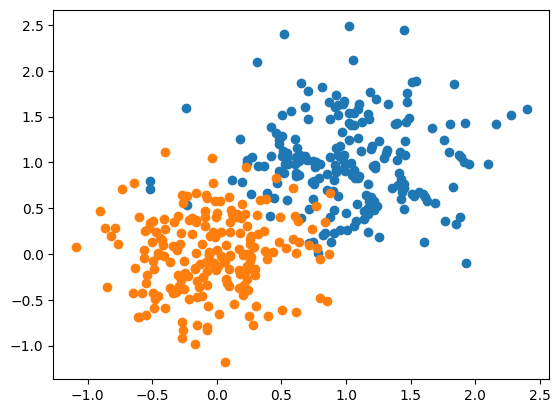

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(mean,sta_dev) : 
    return np.random.normal(mean,sta_dev,200)

x1 = gaussian(1,0.5)
y1 = gaussian(1,0.5)
plt.scatter(x1,y1)

x2 = gaussian(0,0.4)
y2 = gaussian(0,0.4)
plt.scatter(x2,y2)

plt.show()

3. Profile plot

Produce a profile plot from a scatter plot.

Download the following pickle file:
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
Inspect the dataset, you'll find two variables (features)
Convert the content to a Pandas Dataframe
Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
Comment on the correlation between these variables.

Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
Obtain 3 numpy arrays:
x, the array of bin centers of the profile histogram of the "distance" variable
y, the mean values of the "residuals", estimated in slices (bins) of "distance"
err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
Plot the profile plot on top of the scatter plot

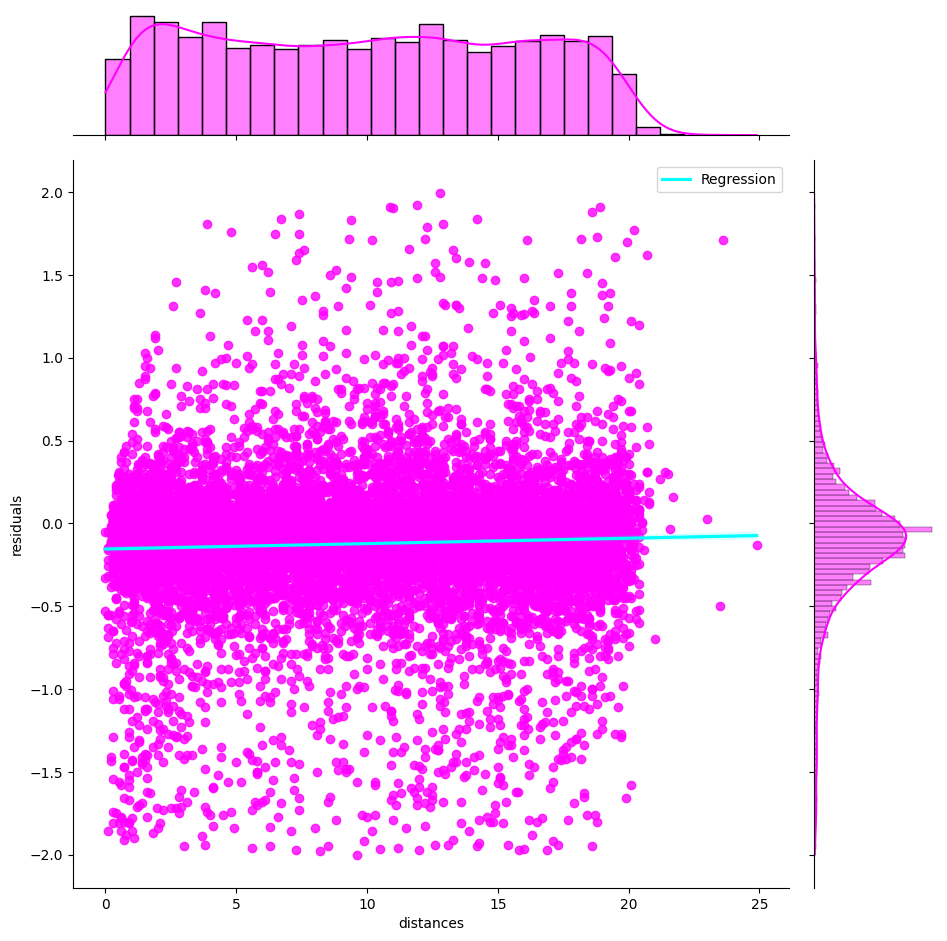

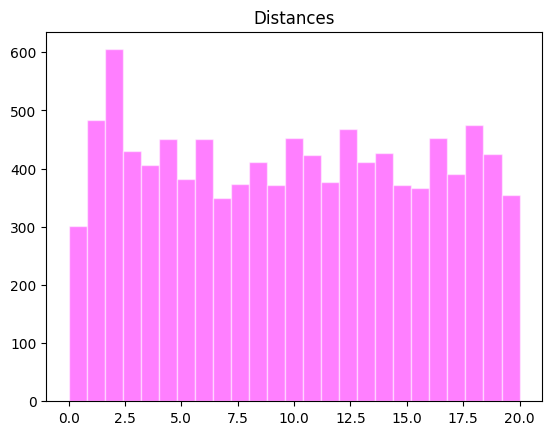

x:
[ 0.4  1.2  2.   2.8  3.6  4.4  5.2  6.   6.8  7.6  8.4  9.2 10.  10.8
 11.6 12.4 13.2 14.  14.8 15.6 16.4 17.2 18.  18.8 19.6]

y:
[-0.23334013605442772, -0.15755664004732142, -0.17261881149154032, -0.17265891472867756, -0.1411489841986534, -0.1253149206349072, -0.13273011717775512, -0.14486896842993777, -0.09200968754262727, -0.06308125923400477, -0.10698127600554033, -0.07129621095749959, -0.0826782297908158, -0.06445007317348095, -0.09530335934848333, -0.0836770451770448, -0.10805016799907265, -0.160195282807955, -0.16657834101381522, -0.10807084526461247, -0.12948735777497009, -0.18194154183413255, -0.12654025062656765, -0.11727137254902373, -0.03681678773205391]

err_y:
[0.4700588141456735, 0.4556535903066799, 0.4169192860411486, 0.42788007790199317, 0.41456157917050324, 0.3690118869515621, 0.37173679034485, 0.4674984551138312, 0.43991848237494285, 0.4384711211211886, 0.43880848874263295, 0.41794274117981045, 0.43093073405161025, 0.4569439831599645, 0.47166644112030204, 0.4845

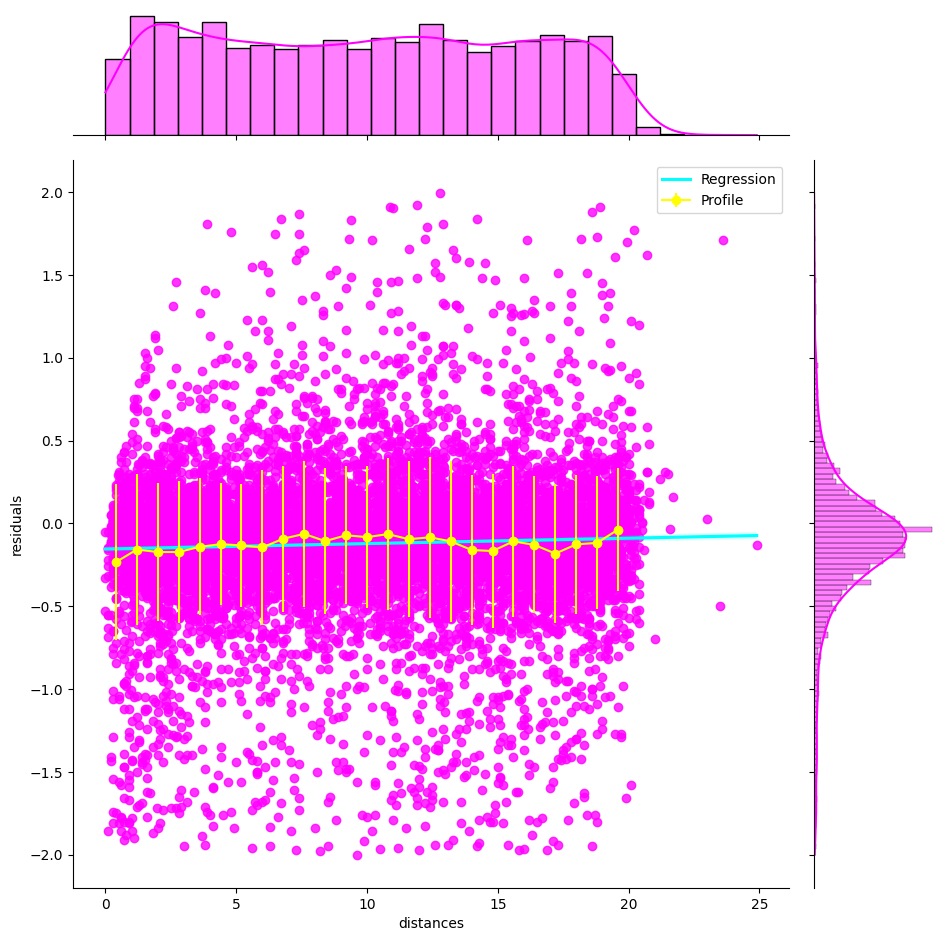

In [18]:
import seaborn as sns
import math


data = np.load('residuals_261.pkl', allow_pickle=True).item()
pnddf = pd.DataFrame(data) 
pnddf = pnddf[abs(pnddf['residuals'])<2]

im = sns.jointplot(x='distances', y='residuals', data=pnddf, kind="reg", color="magenta", joint_kws={'line_kws':{'color':'cyan', 'label':'Regression'}})
im.ax_joint.legend()
im.fig.set_size_inches(10,10)
plt.show()

bin = 25
(n, bins, patches) = plt.hist(pnddf['distances'], bins=bin, facecolor='magenta', alpha=0.5, edgecolor='white', range=(0,20))
plt.title("Distances")
plt.show()


x=(bins[1:]+bins[:-1])*0.5
print(f"x:\n{x}")


y = [pnddf["residuals"][(pnddf['distances'] >=bins[i]) & (pnddf['distances'] <=bins[i+1])].mean() for i in range(bin)]
print(f"\ny:\n{y}")


err_y = [pnddf["residuals"][(pnddf['distances'] >bins[i]) & (pnddf['distances'] <bins[i+1])].std() for i in range(bin)]
print(f"\nerr_y:\n{err_y}")


im2 = sns.jointplot(x='distances', y='residuals', data=pnddf, kind="reg", color="magenta", joint_kws={'line_kws':{'color':'cyan', 'label':'Regression'}}) #scatter
im2.fig.set_size_inches(10,10)
plt.sca(im2.ax_joint)
plt.errorbar(x=x, y=y , yerr=err_y, marker = 'o', color = 'yellow', xlolims=22, label="Profile") #profile
plt.legend()
plt.show()


4. Kernel Density Estimate

Produce a KDE for a given distribution (by hand, not using seaborn):

Fill a numpy array x of length N (with ) with a variable normally distributed, with a given mean and standard deviation
Fill an histogram in pyplot taking proper care of the aesthetic:
use a meaningful number of bins
set a proper y axis label
set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
display the histograms as data points with errors (the error being the poisson uncertainty)
For every element of x, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
 
you can use the scipy function stats.norm() for that.

In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the scipy.integrate.trapz() method. Superimpose the normalized sum of all gaussians to the first histogram.


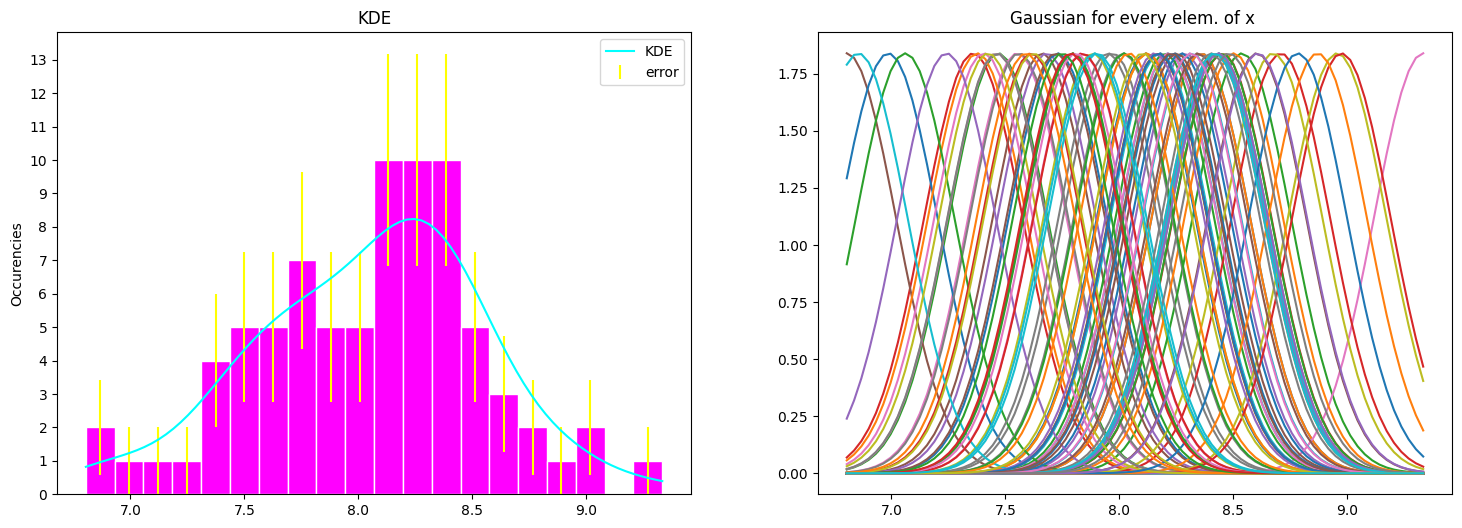

In [9]:
from scipy import stats
import scipy
from matplotlib.ticker import AutoMinorLocator

mean = 8
std = 0.5
N=80
n_bins = int(N/4)
x = mean + std*np.random.randn(N)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) 

bins = ax1.hist(x, bins=n_bins, color='magenta',edgecolor='white')
ax1.set_title('Histogram')
ax1.set_ylabel('Occurencies')
ax1.set_yticks(np.arange(0, N, 1)) 
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])*0.5
ax1.errorbar(bins_center, bins[0], yerr=error, fmt='none', color='yellow', label="error")

std_def = 1.06*x.std() * x.size**(-1/5)
gaussians=[]
space = np.linspace(np.min(x), np.max(x), N)
for item in x:
    nrm = stats.norm(item, std_def)
    gaussians.append(nrm.pdf(space))
    ax2.plot(space, gaussians[-1])
ax2.set_title("Gaussian for every elem. of x ")

area_sog = scipy.integrate.trapz(np.sum(gaussians, axis=0), space)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sog/area_hist
norm_sog = np.sum(gaussians, axis=0)/k_norm

ax1.set_title('KDE')
ax1.plot(space, norm_sog, color="cyan", label="KDE")
ax1.legend()
plt.show()